# Creating a K Nearest Neighbour from the scratch (ish)

First lets import some libraries we are going to use

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Now lets import the dataset.
I am going to be using the dataset from sklearn called Iris<br>
You have probably heard of this dataset since it is used in a lot of tutorials and it is a simple dataset

In [2]:
from sklearn import datasets

df = datasets.load_iris()

X = pd.DataFrame(df.data, columns=df.feature_names)
y = pd.DataFrame(df.target, columns=['target'])

I did explore the dataset before hand and I would recommend you do the same to understand what I am about to do in this notebook

## Creating the Distance function

The KNN algorithm uses the minkowski-distance<br>
So lets create our own function for it

In [3]:
def distance(a, b, p):
    dist = 0
    for i in range(len(a)):
        dist += abs(a[i] - b[i]) ** p
    return dist**(1/p)

Now since we our using the distance between these points we need to scale the data

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Splitting the data

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,
                                                 test_size = 0.25)

## The Algorithm
Now its finally time to create the algorithm

In [6]:
def Knn(X_train, X_test, y_train, y_test, k, p):
    from collections import Counter
    # to help with labels
    
    pred = []
    for test in X_test:
        dist = []
        for train in X_train:
            d = distance(train, test, p)
            dist.append(d)
        dist_data = pd.DataFrame(dist, y_train.index, ['Distance'])
        
        # Sorting to k closest points
        nearest_neighbour = dist_data.sort_values(by=['Distance'], axis=0)[:k]
        neighbour = (list(map(int,
                              y_train.loc[(nearest_neighbour.index)].values)))
        
        counter = Counter(neighbour)
        
        res = counter.most_common()[0][0]
        pred.append(res)
    
    return pred

## Time to see how the algorithm works

In [7]:
predictions = pd.DataFrame(Knn(X_train, X_test, y_train, y_test, 3, 2),
                           columns=['target'])

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.8947368421052632


The KNN algorithm has the K-neighbour parameter, lets see how it affects the algorithm

## Plot

[]

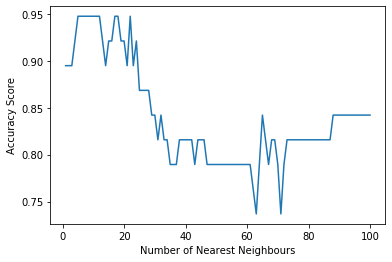

In [8]:
score = []
for i in range(1, 101):
    line = None
    line = pd.DataFrame(Knn(X_train, X_test, y_train, y_test, i, 2),
                           columns=['target'])
    score.append(accuracy_score(y_test, line))
    
# Plotting
plt.plot(range(1, 101), score)
plt.xlabel("Number of Nearest Neighbours")
plt.ylabel("Accuracy Score")
plt.plot()

Notice how the graph is boxy, this is due to the split ratio

# Conclusion

Although I have created a version of the KNN Clustering Algorithm <br>
I believe it is no where as complex and efficient as the one that you may find in libraries<br>
Another point to notice is that my algorithm does not take into account which points are closer, ie., the weightage of points in its negibhourhood<br>
This notebook is just to show the basic intuition behind the K-NN algortihm<br>
<i>(Not even the adjusted Knn algortihm; Asian parents be disappointed)</i><br>
Do not think of this as a template or guide to fully understand the algortihm.